## IHP SG13G2 process - VGS sweep

### Disable auto-scrolling

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Simulation

In [2]:
%%writefile .spiceinit
set ngbehavior=hs
set ng_nomodcheck
set color0=white
set color1=black
set xbrushwidth=2
set altshow

Overwriting .spiceinit


In [16]:
%%writefile ihp_netlist_sweep.spice
* vgs sweep 
*

** spice model 
.lib ~/share/pdks/ihp-sg13g2/libs.tech/ngspice/models/cornerMOSlv.lib mos_tt

** options
.options nomod numdgt=3

** parameters
.global gnd

** temperature
.TEMP 27

** transistor geometrical dimensions
.param L1 = 0.13u
.param width = 5u

** netlist
vdsn dn gnd 0.6
vgsn gn gnd 0.6
Vsdp gnd dp 0.6
Vsgp gnd gp 0.6

xmn dn gn gnd gnd sg13_lv_nmos L='L1' W='width' ng=1 m=1
xmp dp gp gnd gnd sg13_lv_pmos L='L1' W='width' ng=1 m=1

.op
.end

.control
pre_osdi ./psp103_nqs.osdi
save v(dn) v(gn) 
+ @n.xmn.nsg13_lv_nmos[ids] @n.xmn.nsg13_lv_nmos[gm] @n.xmn.nsg13_lv_nmos[gds]
+ @n.xmn.nsg13_lv_nmos[u] @n.xmn.nsg13_lv_nmos[fug]
dc vgsn 0 1.2 0.01
let id_n=@n.xmn.nsg13_lv_nmos[ids]
let gm_n=@n.xmn.nsg13_lv_nmos[gm]
let gds_n=@n.xmn.nsg13_lv_nmos[gds]
let ft_n=@n.xmn.nsg13_lv_nmos[fug]
let ao_n=@n.xmn.nsg13_lv_nmos[u]
write ./spiceout/ihp_sweep_n.raw id_n gm_n gds_n ft_n ao_n v(dn) v(gn)

save v(dp) v(gp) 
+ @n.xmp.nsg13_lv_pmos[ids] @n.xmp.nsg13_lv_pmos[gm] @n.xmp.nsg13_lv_pmos[gds]
+ @n.xmp.nsg13_lv_pmos[u] @n.xmp.nsg13_lv_pmos[fug] 
dc vsgp 0 1.2 0.01
let id_p=@n.xmp.nsg13_lv_pmos[ids]
let gm_p=@n.xmp.nsg13_lv_pmos[gm]
let gds_p=@n.xmp.nsg13_lv_pmos[gds]
let ft_p=@n.xmp.nsg13_lv_pmos[fug]
let ao_p=@n.xmp.nsg13_lv_pmos[u]
write ./spiceout/ihp_sweep_p.raw id_p gm_p gds_p ft_p ao_p v(dp) v(gp)
.endc

Overwriting ihp_netlist_sweep.spice


In [17]:
!ngspice -b ihp_netlist_sweep.spice


Note: Compatibility modes selected: hs


Circuit: * vgs sweep 

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 121
binary raw file "./spiceout/ihp_sweep_n.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 121
binary raw file "./spiceout/ihp_sweep_p.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
	Node                                  Voltage
	----                                  -------
	----	-------
	n.xmn.nsg13_lv_nmos#implicit_equation_6   0.000000e+00
	n.xmn.nsg13_lv_nmos#flow(SPLINE7)   0.000000e+00
	n.xmn.nsg13_lv_nmos#flow(RES7)   0.000000e+00
	n.xmn.nsg13_lv_nmos#implicit_equation_5   0.000000e+00
	n.xmn.nsg13_lv_nmos#flow(SPLINE6)   0.000000e+00
	n.xmn.nsg13_lv_nmos#flow(RES6)   0.000000e+00
	n.xmn.nsg13_lv_nmos#implicit_equation_4   0.000000e+00
	n.xmn.nsg13_lv_nmos#flow(SPLINE5)   0.000000e+00
	n.xmn.nsg13_lv_nmos#flow(RES5)   0.000000e+00
	n.xmn.nsg13_lv_nmos#implicit_equatio

### Read and process the simulation data

Reading file with encoding  utf_8
File contains 8 traces, reading 8
Binary RAW file with Normal access
['v(v-sweep)', 'i(id_p)', 'gm_p', 'gds_p', 'v(ft_p)', 'v(ao_p)', 'v(dp)', 'v(gp)']


OrderedDict([('Filename', PosixPath('spiceout/ihp_sweep_p.raw')), (' * vgs sweep ', ''), ('Date', 'Wed Dec 27 12:59:24  2023'), ('Plotname', 'DC transfer characteristic'), ('Flags', 'real'), ('No. Variables', 8), ('No. Points', 121), ('Variables', ['v(v-sweep)', 'i(id_p)', 'gm_p', 'gds_p', 'v(ft_p)', 'v(ao_p)', 'v(dp)', 'v(gp)'])])


number of sweeps in the simulation: 1
Reading file with encoding  utf_8
File contains 8 traces, reading 8
Binary RAW file with Normal access
['v(v-sweep)', 'i(id_n)', 'gm_n', 'gds_n', 'v(ft_n)', 'v(ao_n)', 'v(dn)', 'v(gn)']


OrderedDict([('Filename', PosixPath('spiceout/ihp_sweep_n.raw')), (' * vgs sweep ', ''), ('Date', 'Wed Dec 27 12:59:24  2023'), ('Plotname', 'DC transfer characteristic'), ('Flags', 'real'), ('No. Variables', 8), ('No. Points', 121), ('Variables', ['

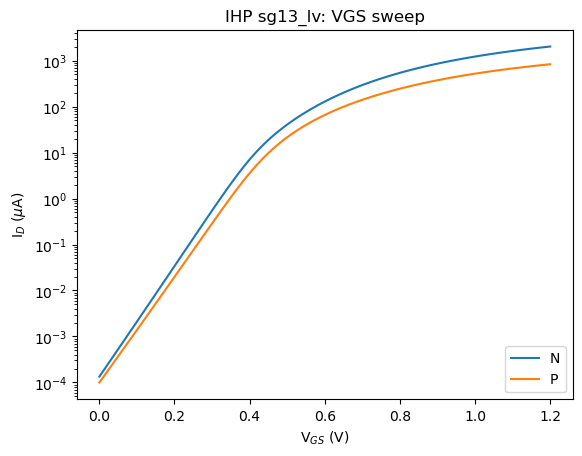

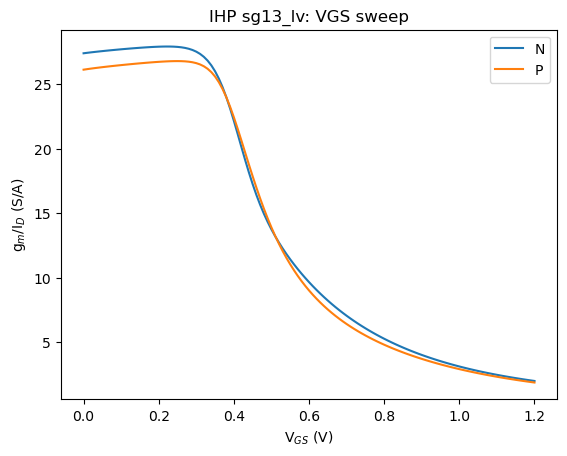

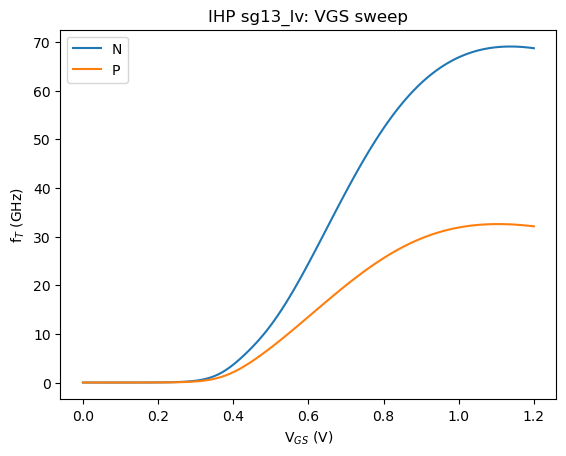

In [19]:
# ihp_sweep.py

from PyLTSpice import RawRead 
import matplotlib.pyplot as plt
import numpy as np
import math


# PMOS
LTR = RawRead("./spiceout/ihp_sweep_p.raw") 
print(LTR.get_trace_names())
print("\n")
print(LTR.get_raw_property())
print("\n")
steps = LTR.get_steps()
p_steps = len(steps) 
print('number of sweeps in the simulation:', p_steps)

# objects containing the data
vgs_p = LTR.get_trace('v(gp)')
id_p = LTR.get_trace('i(id_p)')
gm_p = LTR.get_trace('gm_p')
ft_p = LTR.get_trace('v(ft_p)')
ao_p = LTR.get_trace('v(ao_p)')
gds_p = LTR.get_trace('gds_p')

# NMOS
LT = RawRead("./spiceout/ihp_sweep_n.raw") 
print(LT.get_trace_names())
print("\n")
print(LT.get_raw_property())
print("\n")
steps = LT.get_steps()
n_steps = len(steps) 
print('number of sweeps in the simulation:', n_steps)

# objects containing the data
vgs_n = LT.get_trace('v(gn)')
id_n = LT.get_trace('i(id_n)')
gm_n = LT.get_trace('gm_n')
ft_n = LT.get_trace('v(ft_n)')
ao_n = LT.get_trace('v(ao_n)')
gds_n = LT.get_trace('gds_n')

# extract the data from the objects
if p_steps == 1 & n_steps == 1:
   VSGp  = -vgs_p.get_wave(0)
   IDp  = id_p.get_wave(0)
   GMp  = gm_p.get_wave(0)
   GDSp  = gds_p.get_wave(0)
   FTp  = ft_p.get_wave(0)
   Aop  = ao_p.get_wave(0)
   VGSn  = vgs_n.get_wave(0)
   IDn  = id_n.get_wave(0)
   GMn  = gm_n.get_wave(0)
   GDSn  = gds_n.get_wave(0)
   FTn  = ft_n.get_wave(0)
   Aon  = ao_n.get_wave(0)

fig1 = plt.figure(1)
plt.title("IHP sg13_lv: VGS sweep" )
plt.xlabel("V$_{GS}$ (V)")
plt.ylabel("I$_D$ ($\mu$A)")
plt.semilogy(VGSn,IDn*1e6,label="N")
plt.semilogy(VSGp,IDp*1e6,label="P")
plt.legend(loc="lower right")
plt.show()

fig2 = plt.figure(2)
plt.title("IHP sg13_lv: VGS sweep" )
plt.xlabel("V$_{GS}$ (V)")
plt.ylabel("g$_m$/I$_D$ (S/A)")
plt.plot(VGSn,GMn/IDn,label="N")
plt.plot(VSGp,GMp/IDp,label="P")
plt.legend(loc="upper right")
plt.show()

fig3 = plt.figure(3)
plt.title("IHP sg13_lv: VGS sweep" )
plt.xlabel("V$_{GS}$ (V)")
plt.ylabel("f$_T$ (GHz)")
plt.plot(VGSn,FTn*1e-9,label="N")
plt.plot(VSGp,FTp*1e-9,label="P")
plt.legend(loc="upper left")
plt.show()